# HT 8. RNA

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FabianJuarez182/MD-HT8.git)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


## Análisis exploratorio de los datos

In [24]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


In [26]:
columns_with_na = datos.isna().any()
# Recorrer todas las columnas y rellenar con 0 donde sea necesario
for column in columns_with_na.index:
    if columns_with_na[column]:
        datos[column] = datos[column].fillna(0)

In [27]:
# Definir los límites de las categorías basadas en los percentiles
bins = datos['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['CategoriaPrecio'] = pd.cut(datos['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)


### Inciso 4

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Preparación de datos
X = datos.drop(['SalePrice', 'CategoriaPrecio'], axis=1)
y = datos['CategoriaPrecio']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Modelo 1: 3 capas ocultas con activaciones ReLU y Softmax en la salida
model1 = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Modelo 2: 4 capas ocultas con activaciones ReLU, tanh y Softmax en la salida
model2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3290 - loss: 340.5935
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5113 - loss: 38.7799
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5923 - loss: 19.2529
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6557 - loss: 12.7425
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 11.4368
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6004 - loss: 14.4370
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6395 - loss: 10.4427
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 7.9681
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 9.4931
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6835 - loss: 8.0691


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3239 - loss: 1.1972
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4037 - loss: 1.0830
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4573 - loss: 1.0309
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3436 - loss: 1.0936
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3661 - loss: 1.0962
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4093 - loss: 1.0692
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3829 - loss: 1.0797
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3271 - loss: 1.1216
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3658 - loss: 1.1013
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3768 - loss: 1.0909


In [32]:
# Predicciones
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)

# Convertir las predicciones de probabilidades a etiquetas
predicted_labels1 = np.argmax(predictions1, axis=1)
predicted_labels2 = np.argmax(predictions2, axis=1)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


### Inciso 5

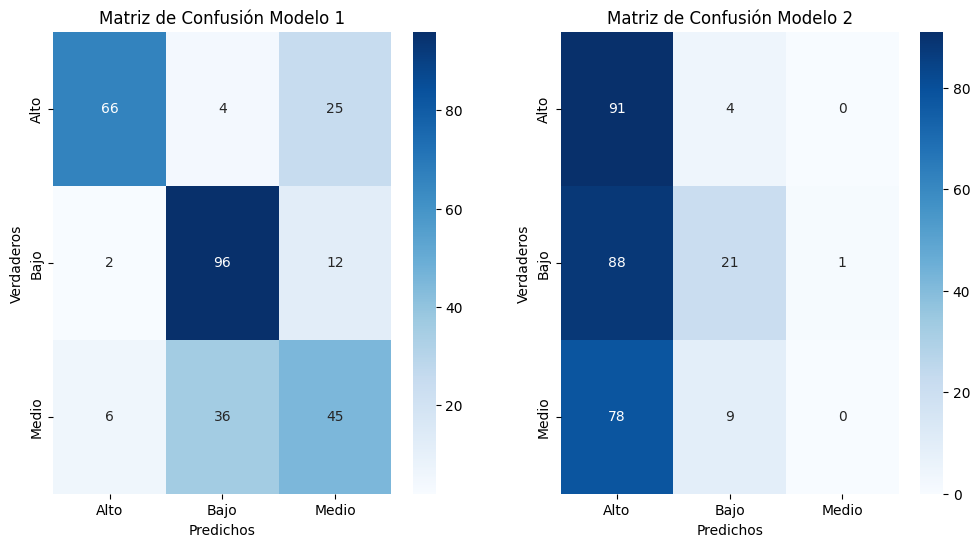

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrices de confusión
cm1 = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels1)
cm2 = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels2)

# Visualización con Seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión Modelo 1')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión Modelo 2')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

plt.show()


### Inciso 6

### Inciso 7

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6792 - loss: 8.3463 - val_accuracy: 0.6923 - val_loss: 12.2229
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6515 - loss: 15.3218 - val_accuracy: 0.6667 - val_loss: 14.7317
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6433 - loss: 12.9694 - val_accuracy: 0.7179 - val_loss: 9.3494
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6676 - loss: 11.3930 - val_accuracy: 0.6410 - val_loss: 10.3384
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7052 - loss: 9.2746 - val_accuracy: 0.6154 - val_loss: 19.0126
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6400 - loss: 16.6958 - val_accuracy: 0.6154 - val_loss: 24.5055
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6405 - loss: 17.5674 - val_accuracy: 0.6795 - val_loss: 9.8318
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6989 - loss: 8.6424 - val_accuracy: 0.6453

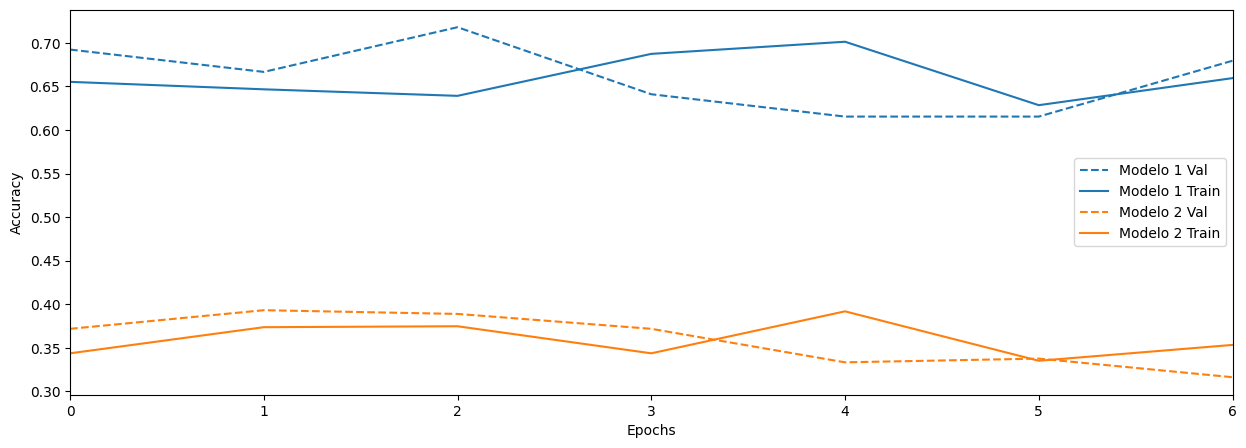

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback para detener el entrenamiento si la validación no mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento con datos de validación para monitoreo de sobreajuste
history1 = model1.fit(
    X_train, 
    y_train, 
    epochs=50,  # Más épocas para ver el efecto a largo plazo
    batch_size=32, 
    verbose=1, 
    validation_split=0.2,  # 20% de los datos para validación
    callbacks=[early_stopping]
)

history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    verbose=1, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

# Gráficas de precisión y pérdida de entrenamiento vs. validación
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Usar esta función para graficar
plot_history([('modelo 1', history1), ('modelo 2', history2)])

plt.show()


### Inciso 8

### Inciso 9

### Inciso 10